In [1]:
# Importing required libraries:

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper:

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, inspect, distinct, desc, Table, Column, extract

In [3]:
# reflect an existing database into a new model:

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect the tables:

Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found:

Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table:

Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB:

session = Session(engine)

# reading data:

sql1 = "SELECT * FROM measurement"
list(engine.execute(sql1))

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [8]:
sql2 = "SELECT * FROM station"
list(engine.execute(sql2))

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [9]:
# Assigning dataframe

df_measurement = pd.read_sql(sql1, con=engine)
df_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [10]:
df_station = pd.read_sql(sql2, con=engine)
df_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [11]:
# Updating the date column:

df_measurement['date'] = pd.to_datetime(df_measurement['date'])
df_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


# Exploratory Climate Analysis

#### Design a query to retrieve the last 12 months of precipitation data and plot the results:


In [12]:
# Calculate last data point in the database:

last_datapt_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_datapt_date

('2017-08-23')

In [13]:
# Calculate the date 1 year ago from the last data point in database:

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Date 1 year ago from last data point:",year_ago)

Date 1 year ago from last data point: 2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores

query1 = (session
          .query(Measurement.date, Measurement.prcp)
          .filter(Measurement.date >= year_ago))
query1.all()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df_1yr_prcp_results = pd.read_sql_query(query1.statement, session.bind).sort_values(by='date')
df_1yr_prcp_results.head(10)

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
1,2016-08-24,0.08
1530,2016-08-24,2.15
705,2016-08-24,2.28


In [16]:
# Resetting index as date:

df_1yr_prcp_results_1 = pd.read_sql_query(query1.statement, session.bind).sort_values(by='date').set_index('date')
df_1yr_prcp_results_1.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


In [17]:
prcp = df_1yr_prcp_results['prcp']

#### Use Pandas Plotting with Matplotlib to plot the data

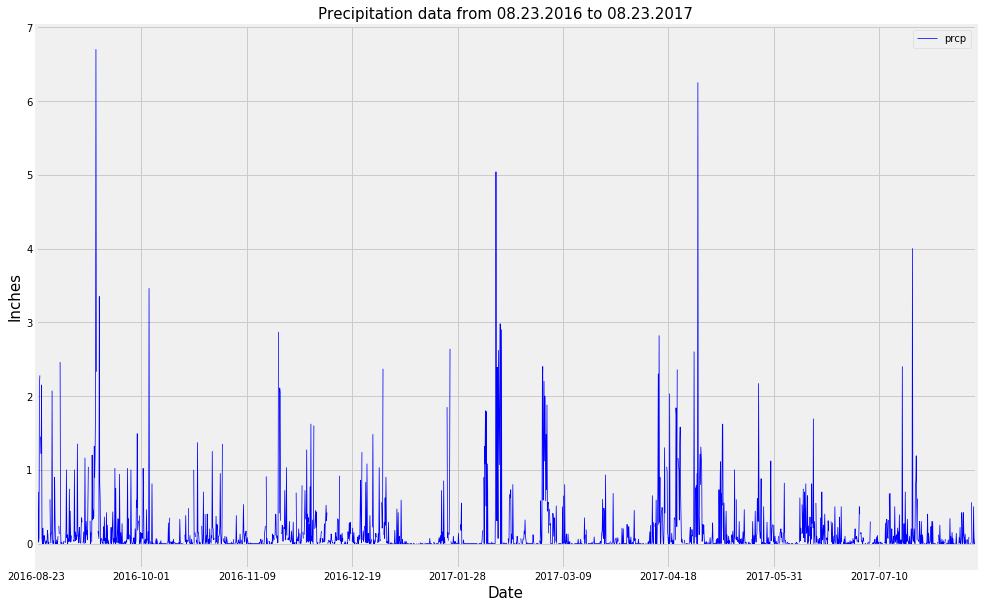

In [18]:

df_1yr_prcp_results.plot(x='date', y='prcp', kind='line', lw=0.75, c='b',
                         figsize=(15,10), grid=True,legend=True,fontsize=10)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Inches',fontsize=15)
plt.title('Precipitation data from 08.23.2016 to 08.23.2017',fontsize=15)
plt.savefig('Precipitation data from 08-23-2016 to 08-23-2017.png')

plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data:

# for full dataset:

df_measurement['prcp'].describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

#### Since the questions doesn't specify if the summary statistics for the precipitation data is for the 1 year period or complete data, I have done it both ways.

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data for the 1 year period:

# for full dataset:

df_1yr_prcp_results['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [21]:
# Design a query to show how many stations are available in this dataset?

# query2=session.query(Station.station).count()
# print(query2)

Number_of_stations = session.query(Measurement.station).distinct().count()

print(f"The number of stations in this dataset are {Number_of_stations}")

The number of stations in this dataset are 9


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

query3 = session.query(Measurement.station, func.count(Measurement.station).label("activity_count")).\
            group_by(Measurement.station).order_by(desc('activity_count'))
query3.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# The most active station:

Most_active_station=query3[0][0]
print(f"Most Active Station: {Most_active_station}")

Most Active Station: USC00519281


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

query4 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == Most_active_station).all()

print(f"The lowest temperature recorded: {query4[0][0]}, highest temperature recorded: {query4[0][1]}, and average temperature recorded: {query4[0][2]}")


The lowest temperature recorded: 54.0, highest temperature recorded: 85.0, and average temperature recorded: 71.66378066378067


In [25]:
# Choose the station with the highest number of temperature observations.

query5 = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print(f"Station with highest number of temperature observations: {query5[0]}")

Station with highest number of temperature observations: USC00519281


In [26]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query6 = session.query( Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == query5[0]).all()

df_1yr_tobs_results = pd.DataFrame(query6, columns=['temperature'])
df_1yr_tobs_results

,temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


#### The other approach to would be to select the data of most active station from query4

In [27]:
# query5 = (session
#           .query(Measurement.date, Measurement.tobs)
#           .filter(Measurement.station == Most_active_station)
#           .filter(Measurement.date >= year_ago))
# query5.all()

#### Plotting the Histogram:

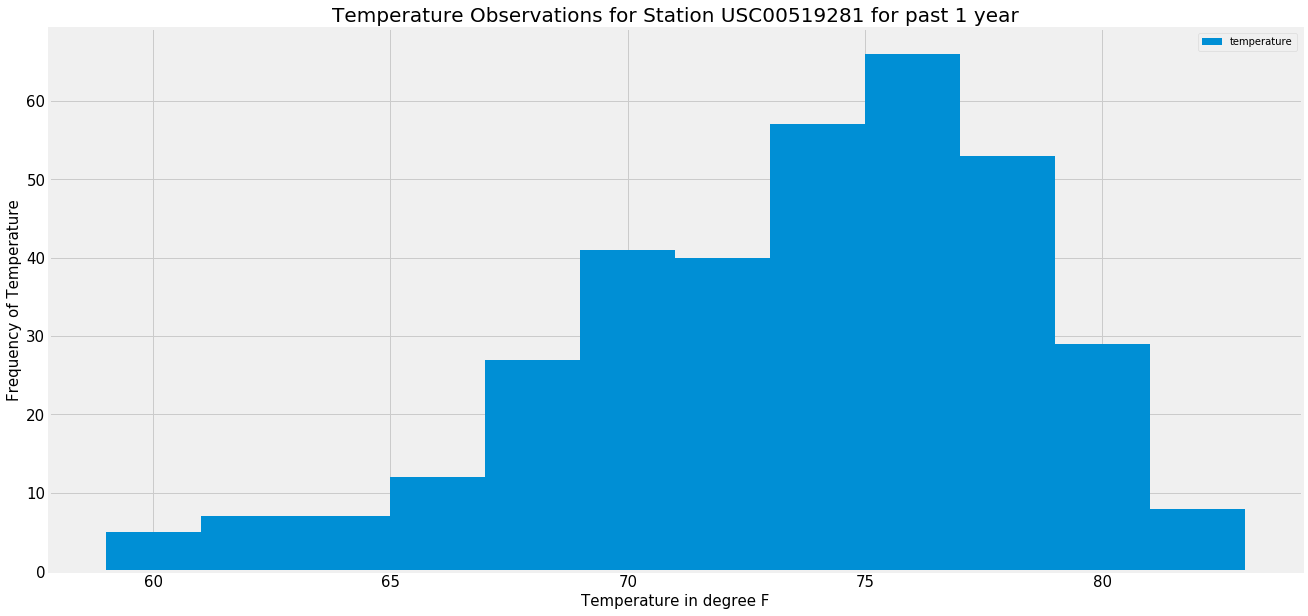

In [28]:
df_1yr_tobs_results.plot.hist(by='tobs',bins=12, figsize=(20,10),fontsize=15)
plt.xlabel('Temperature in degree F',fontsize=15)
plt.ylabel('Frequency of Temperature',fontsize=15)
plt.title('Temperature Observations for Station USC00519281 for past 1 year', fontsize=20)
plt.savefig('Temperature Observations for Station USC00519281 for past 1 year.png')
plt.show()

## Bonus Challenge Assignment

### Temperature Analysis I

* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

* You may either use SQLAlchemy or pandas's `read_csv()` to perform this portion.

* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [29]:
 # Extracting month from date column and creating the dataframe with new column for month:


df_measurement['month'] = df_measurement['date'].map(lambda x: x.strftime('%m'))
df_measurement_new = pd.DataFrame(df_measurement)
df_measurement_new


,id,station,date,prcp,tobs,month
0,1,USC00519397,2010-01-01,0.08,65.0,01
1,2,USC00519397,2010-01-02,0.00,63.0,01
2,3,USC00519397,2010-01-03,0.00,74.0,01
3,4,USC00519397,2010-01-04,0.00,76.0,01
4,5,USC00519397,2010-01-06,NaN,73.0,01
...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,08
19546,19547,USC00516128,2017-08-20,NaN,78.0,08
19547,19548,USC00516128,2017-08-21,0.56,76.0,08
19548,19549,USC00516128,2017-08-22,0.50,76.0,08


In [30]:
# Calculating stats for every month's data: reference purpose only:

stats_df = df_measurement.groupby("month")["tobs"].describe()
stats_df

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
01,1727.0,68.726115,4.367892,54.0,66.0,69.0,72.0,81.0
02,1610.0,69.442236,3.981399,56.0,67.0,70.0,72.0,83.0
03,1693.0,70.059067,3.845271,56.0,68.0,70.0,73.0,82.0
04,1713.0,72.357268,3.632131,53.0,70.0,73.0,75.0,84.0
05,1733.0,73.680900,3.355783,63.0,71.0,74.0,76.0,87.0
06,1700.0,74.944118,3.257417,64.0,73.0,75.0,77.0,85.0
07,1711.0,76.082408,3.356532,61.0,74.0,76.0,78.0,87.0
08,1622.0,76.412454,3.453138,65.0,74.0,76.0,79.0,87.0
09,1480.0,76.164865,3.535178,64.0,74.0,76.0,79.0,87.0


In [31]:
# Average temperature in June at all stations across all available years in the dataset

june_stats = df_measurement_new[(df_measurement_new['month'] == '06')]
june_stats.reset_index(inplace= True)

june_stats

,index,id,station,date,prcp,tobs,month
0,133,134,USC00519397,2010-06-01,0.00,78.0,06
1,134,135,USC00519397,2010-06-02,0.01,76.0,06
2,135,136,USC00519397,2010-06-03,0.00,78.0,06
3,136,137,USC00519397,2010-06-04,0.00,76.0,06
4,137,138,USC00519397,2010-06-05,0.00,77.0,06
...,...,...,...,...,...,...,...
1695,19492,19493,USC00516128,2017-06-26,0.02,79.0,06
1696,19493,19494,USC00516128,2017-06-27,0.10,74.0,06
1697,19494,19495,USC00516128,2017-06-28,0.02,74.0,06
1698,19495,19496,USC00516128,2017-06-29,0.04,76.0,06


In [50]:
Jun_tobs_mean = june_stats.mean()['tobs']
Jun_tobs_mean

74.94411764705882

In [51]:
# Average temperature in December at all stations across all available years in the dataset


dec_stats = df_measurement_new[(df_measurement_new['month'] == '12')]
dec_stats.reset_index(inplace= True)
dec_stats

,index,id,station,date,prcp,tobs,month
0,305,306,USC00519397,2010-12-01,0.04,76.0,12
1,306,307,USC00519397,2010-12-03,0.00,74.0,12
2,307,308,USC00519397,2010-12-04,0.00,74.0,12
3,308,309,USC00519397,2010-12-06,0.00,64.0,12
4,309,310,USC00519397,2010-12-07,0.00,64.0,12
...,...,...,...,...,...,...,...
1512,19323,19324,USC00516128,2016-12-27,0.14,71.0,12
1513,19324,19325,USC00516128,2016-12-28,0.14,71.0,12
1514,19325,19326,USC00516128,2016-12-29,1.03,69.0,12
1515,19326,19327,USC00516128,2016-12-30,2.37,65.0,12


In [47]:
Dec_tobs_mean = dec_stats.mean()['tobs']
Dec_tobs_mean

71.04152933421226

In [53]:
# Calculating the independent/unpaired ttest:

sts.ttest_ind(june_stats['tobs'], dec_stats['tobs'])

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

#### Conclusion: P value of 3.9025 indicates that there is no relationship between the Temperature observed in June and December. I used Independent Ttest as I think there isnt any dependency between the temperatures observed in both the months.

### Temperature Analysis II

In [35]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [36]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

Trip_start_date = '2016-11-28'
Trip_end_date = '2016-12-06'

My_trip = (calc_temps(Trip_start_date, Trip_end_date))

print(f" The tmin, tavg and tmax for my trip dates is {My_trip}")

 The tmin, tavg and tmax for my trip dates is [(67.0, 72.35, 77.0)]


([<matplotlib.axis.YTick at 0x25733973308>,
 <a list of 6 Text yticklabel objects>)

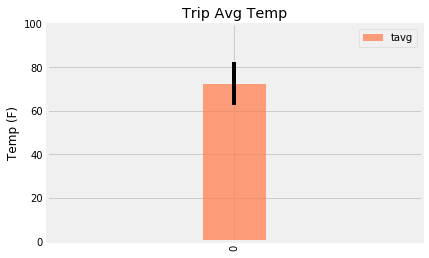

In [37]:
# Assinging a DataFrame:

Trip_df = pd.DataFrame(My_trip, columns=['tmin', 'tavg', 'tmax'])

# query7 = session.query(Measurement.date, Measurement.tobs).\
#         filter(Measurement.date >= Trip_start_date).filter(Measurement.date <= Trip_end_date).all()
# query7


yerr= Trip_df['tmax']-Trip_df['tmin']

Trip_df.plot.bar(y='tavg', alpha=.75, align = "center", yerr = yerr, color='coral',width=0.1)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.yticks(np.arange(0, 120, 20))


In [38]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# query6 = engine.execute('SELECT measurement.station, name, latitude, longitude, elevation, SUM(prcp) FROM measurement \
# LEFT JOIN station ON measurement.station = station.station \
# WHERE date BETWEEN "2016-11-28" AND "2016-12-06" GROUP BY measurement.station ORDER BY AVG(prcp) DESC').fetchall()
# query6

def prcp(start_date, end_date):
    
    """Precipitation information per weather station
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        A list of tuples containing precipitation amount, station, name, latitude, longitude, and elevation in descending order.
    """
    
    sel = [Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,Measurement.prcp]    
    return session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

print(prcp(Trip_start_date,Trip_end_date))


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.69), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.02), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.01), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


In [39]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

* Calculate the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

* You are provided with a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic TOBS that match that date string.

* Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

* Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

In [40]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

Trip_start_date = '2016-11-28'
Trip_end_date = '2016-12-06'


date_ranges = session.query(Measurement.date).filter(Measurement.date >= Trip_start_date).filter(Measurement.date <= Trip_end_date).group_by(Measurement.date).all()

# List comprehension to get the elements in the tuple from the dates query 
tripdates = [x[0] for x in date_ranges]

# Stip off the year and save a list of %m-%d strings with another list comprehension 
tripdates_new= [x[5:] for x in tripdates]

# Find the start month/day and the end month/day 
start_m_d = tripdates_new[0]
end_m_d = tripdates_new[-1]
   
# Loop through the list of %m-%d strings and calculate the normals for each date    
query8 = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_m_d).filter(func.strftime("%m-%d", Measurement.date) <= end_m_d).group_by(func.strftime("%m-%d", Measurement.date)).all()]

query8 = query8[0]
print("Aggregate Daily Normals from 11-28 to 12-06")
query8


Aggregate Daily Normals from 11-28 to 12-06


[(62.0, 72.75510204081633, 80.0),
 (62.0, 71.01960784313725, 79.0),
 (61.0, 71.8076923076923, 79.0),
 (65.0, 71.91666666666667, 78.0),
 (62.0, 71.32692307692308, 77.0),
 (67.0, 72.88679245283019, 79.0),
 (66.0, 72.17647058823529, 81.0),
 (64.0, 70.92156862745098, 78.0),
 (61.0, 69.3921568627451, 78.0)]

In [41]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

query8= pd.DataFrame(query8,columns=['TMIN', 'TAVG', 'TMAX'])
query8['date']=tripdates
query8.set_index('date')

,TMIN,TAVG,TMAX
date,,,
2016-11-28,62.0,72.755102,80.0
2016-11-29,62.0,71.019608,79.0
2016-11-30,61.0,71.807692,79.0
2016-12-01,65.0,71.916667,78.0
2016-12-02,62.0,71.326923,77.0
2016-12-03,67.0,72.886792,79.0
2016-12-04,66.0,72.176471,81.0
2016-12-05,64.0,70.921569,78.0
2016-12-06,61.0,69.392157,78.0


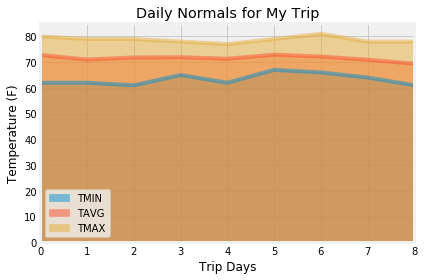

In [43]:
# Plot the daily normals as an area plot with `stacked=False`

query8.plot(kind='area', alpha=.5, stacked=False,  title="Daily Normals for My Trip")
plt.xlabel('Trip Days')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.savefig("Daily Normals for My Trip.png")
plt.show()

